In [1]:
import numpy as np
import torch
import torch.nn.functional as F
import torch.nn as nn
import gym
import time
from tqdm import tqdm
import json
from utils.utils import get_similarity, get_loader
from utils.utils import get_dataset, CreateTorchDataset
from torch.utils.data import Dataset, DataLoader
from utils.models import PendulumDynamicsModel, PendulumRewardModel, PendulumDynamicsModelSuccessor, CartPoleModel
from utils.plot_utils import plot_task_similarity_score
from utils.utils import train_model, eval_model


In [11]:
# half-cheetah environment specific information
state_dim = 17   # state dimension
action_dim = 6  # action dimension
in_features = state_dim + action_dim   # number of input features


# instantiate model class
model_s = CartPoleModel(in_features=in_features, 
                out_features=state_dim)
model_t = CartPoleModel(in_features=in_features, 
                out_features=state_dim)


model_source_path = 'saved_data/halfcheetah_trained_model/halfcheetah_0.pth'


means = [] 
stds = [] 
for idx in range(3):
    # target data path
    dpath = f'/media/ghost-083/SolarSystem1/1_Research/00_Transfer-RL/Task_similarity/dataset/Halfcheetah/Halfcheetah_dataset_{idx}_train.json'
    model_target_path = f'saved_data/halfcheetah_trained_model/halfcheetah_{idx}.pth'
    # create dataset
    custom_dataset = get_dataset(dpath, ds_type=ds_type)
    halfcheetah_data = CreateTorchDataset(custom_dataset, state_dim=state_dim, 
                                    action_dim=action_dim, ds_type=ds_type)
    target_loader = get_loader(dpath, state_dim=state_dim, 
                                    ds_type='dynamics')


    mean, std = get_similarity(model_s, model_t, model_source_path, model_target_path, target_loader)
    means.append(mean)
    stds.append(std)

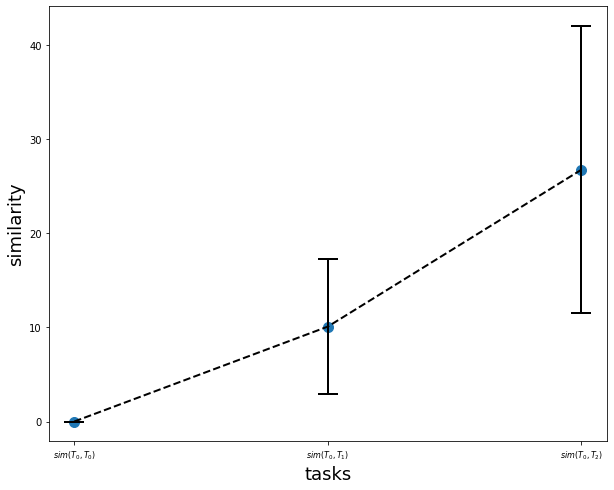

In [16]:
plot_task_similarity_score(means, stds, fig_name='halfcheetah')

In [26]:
# cartpole environment specific information
state_dim = 17   # state dimension
action_dim = 6  # action dimension
in_features = state_dim + action_dim   # number of input features

# create dataset
custom_dataset = get_dataset(dpath, ds_type=ds_type)
halfcheetah_data = CreateTorchDataset(custom_dataset, state_dim=state_dim, 
                                action_dim=action_dim, ds_type=ds_type)
# instantiate model class
model = CartPoleModel(in_features=in_features, 
                out_features=out_features)

batch_size = 32   # fixed batch size for all experiments
model.load_state_dict(torch.load(mpath, map_location='cpu'))
model.eval()
mse = nn.MSELoss()

data_loader = get_loader(dpath, state_dim=state_dim, 
                                ds_type='dynamics')

batch, label = next(iter(data_loader))

with torch.no_grad():
        pred_t, z_t = model(batch.float())



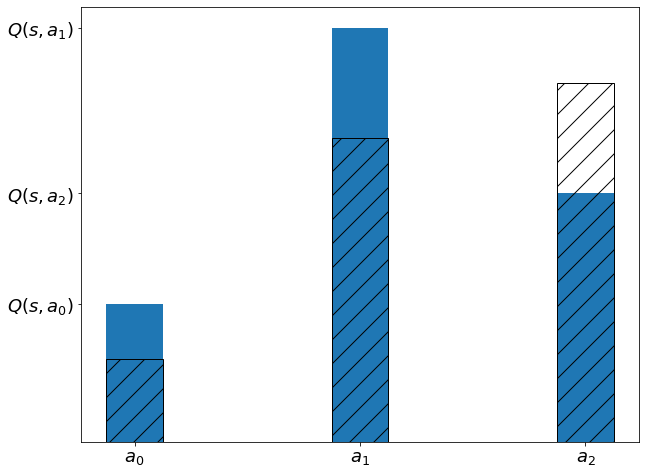

In [62]:
import matplotlib.pyplot as plt 
import numpy as np


y = [0.25, 0.75, 0.45]
y2 = [0.15, 0.55, 0.65]
x = [i for i in range(len(y))]

plt.figure(figsize=(10, 8))
plt.bar(x, y, width=0.25)
plt.bar(x, y2, color='None', edgecolor='black', hatch='/', width=0.25)
plt.xticks(x, ['$a_0$', '$a_1$', '$a_2$'], fontsize=18)
plt.yticks(y, ['$Q(s, a_0)$', '$Q(s, a_1)$', '$Q(s, a_2)$'], fontsize=18)
plt.savefig('toy_mdp_2.png' ,dpi=300)
plt.show()